In [18]:
# Esercizio Dal database AdventureWorks estraiamo la tabella dimproduct 
import os
import dotenv
import sqlalchemy
import pandas as pd

# Load environment variables from .env file
dotenv.load_dotenv(override=True, dotenv_path=".env")

# Get database credentials from environment variables
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

# Build the connection string
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"

# Create SQLAlchemy engine
db_engine = sqlalchemy.create_engine(conn_string)

# Define the query
query = "SELECT * FROM dimproduct"

# Execute the query and load the result into a DataFrame
db = pd.read_sql(query, con=db_engine)
db = pd.DataFrame(db)
# Display the DataFrame
print(db)


     ProductKey ProductAlternateKey  ProductSubcategoryKey  \
0             1             AR-5381                    NaN   
1             2             BA-8327                    NaN   
2             3             BE-2349                    NaN   
3             4             BE-2908                    NaN   
4             5             BL-2036                    NaN   
..          ...                 ...                    ...   
601         602             BB-8107                    5.0   
602         603             BB-9108                    5.0   
603         604          BK-R19B-44                    2.0   
604         605          BK-R19B-48                    2.0   
605         606          BK-R19B-52                    2.0   

    WeightUnitMeasureCode SizeUnitMeasureCode     EnglishProductName  \
0                    None                None        Adjustable Race   
1                    None                None           Bearing Ball   
2                    None              

In [19]:
# • Sulla colonna DealerPrice, utilizzando il metodo .round(), arrotondiamo i valori alle due cifre decimali, e poi al valore intero più vicino 

print(db['DealerPrice'].round()) # INTERO PIU VICINO
print(db['DealerPrice'].round(2)) # DUE CIFRE DECIMALI


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
601     61.0
602     73.0
603    324.0
604    324.0
605    324.0
Name: DealerPrice, Length: 606, dtype: float64
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
601     60.74
602     72.89
603    323.99
604    323.99
605    323.99
Name: DealerPrice, Length: 606, dtype: float64


In [20]:
# • Utilizzando il metodo .clip(), facciamo in modo che i valori siano compresi tra un minimo di 0 e un massimo di 1000
print(db['DealerPrice'].clip(lower=0 ,upper=1000)) 


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
601     60.744
602     72.894
603    323.994
604    323.994
605    323.994
Name: DealerPrice, Length: 606, dtype: float64


In [21]:
# Esercizio Creiamo un DataFrame sintetico, che contiene i guadagni mensili di diverse annate, 
# con il seguente codice: 
import numpy as np
years = 5 
a = pd.DataFrame({
    "Mese": list("GFMAMGLASOND"*years),
    "Anno": np.repeat(list(range(years)), 12),
    "Guadagni": np.random.randint(800, 5000, 12*years)
    }) 
# • Calcola la somma cumulativa delle vendite per ogni mese utilizzando il metodo .cumsum() 
a['SommaCumulativa'] = a['Guadagni'].cumsum()
print(a[["Anno",'Mese','SommaCumulativa']])



    Anno Mese  SommaCumulativa
0      0    G             3700
1      0    F             5083
2      0    M             8709
3      0    A            13279
4      0    M            14203
5      0    G            18796
6      0    L            20226
7      0    A            21796
8      0    S            23611
9      0    O            26638
10     0    N            28963
11     0    D            30507
12     1    G            34577
13     1    F            38479
14     1    M            40241
15     1    A            44273
16     1    M            45354
17     1    G            48867
18     1    L            52191
19     1    A            55582
20     1    S            58130
21     1    O            59831
22     1    N            60641
23     1    D            62042
24     2    G            65756
25     2    F            69606
26     2    M            72104
27     2    A            74187
28     2    M            77308
29     2    G            78973
30     2    L            81515
31     2

In [36]:
# • Come sopra, ma diviso per ogni anno
a['SommaCumulativaPerAnno'] = a.groupby('Anno').Guadagni.cumsum()
print(a[["Anno",'Mese','SommaCumulativaPerAnno']])

    Anno Mese  SommaCumulativaPerAnno
0      0    G                    3700
1      0    F                    5083
2      0    M                    8709
3      0    A                   13279
4      0    M                   14203
5      0    G                   18796
6      0    L                   20226
7      0    A                   21796
8      0    S                   23611
9      0    O                   26638
10     0    N                   28963
11     0    D                   30507
12     1    G                    4070
13     1    F                    7972
14     1    M                    9734
15     1    A                   13766
16     1    M                   14847
17     1    G                   18360
18     1    L                   21684
19     1    A                   25075
20     1    S                   27623
21     1    O                   29324
22     1    N                   30134
23     1    D                   31535
24     2    G                    3714
25     2    

<Axes: >

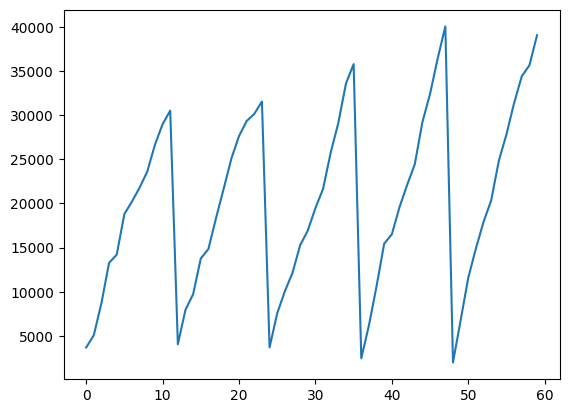

In [37]:
a.SommaCumulativaPerAnno.plot()

In [42]:
a.groupby('Anno')['Guadagni'].sum().cumsum()

Anno
0     30507
1     62042
2     97813
3    137842
4    176875
Name: Guadagni, dtype: int64

In [23]:
# Esercizio 1
# Dal database AdventureWorks estraiamo la tabella dimcustomer 


query2 = "SELECT * FROM dimcustomer"

db_dimcustumer = pd.read_sql(query2, con=db_engine)
db_dimcustumer = pd.DataFrame(db_dimcustumer)


In [24]:
db_dimcustumer.columns

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance'],
      dtype='object')

In [25]:
# • Trasformiamo i nomi dei clienti in modo che abbiano solo lettere minuscole, e i cognomi in modo che abbiano solo lettere maiuscole 

db_dimcustumer['FirstName']= db_dimcustumer['FirstName'].str.lower()
db_dimcustumer['LastName'] = db_dimcustumer['LastName'].str.upper()

print(db_dimcustumer[['FirstName','MiddleName','LastName']])

       FirstName MiddleName LastName
0            jon          V     YANG
1         eugene          L    HUANG
2          ruben       None   TORRES
3        christy       None      ZHU
4      elizabeth       None  JOHNSON
...          ...        ...      ...
18479      tommy          L     TANG
18480       nina          W     RAJI
18481       ivan       None     SURI
18482    clayton       None    ZHANG
18483      jésus          L  NAVARRO

[18484 rows x 3 columns]


In [26]:
# • Sulla colonna EmailAddress, utilizzando il metodo .str.split(), estraiamo nome utente e dominio 
db_dimcustumer[['Username', 'Domain']] = db_dimcustumer['EmailAddress'].str.split('@',expand=True)
print(db_dimcustumer[['Username', 'Domain']])

         Username               Domain
0           jon24  adventure-works.com
1        eugene10  adventure-works.com
2         ruben35  adventure-works.com
3       christy12  adventure-works.com
4      elizabeth5  adventure-works.com
...           ...                  ...
18479      tommy2  adventure-works.com
18480      nina21  adventure-works.com
18481       ivan0  adventure-works.com
18482    clayton0  adventure-works.com
18483      jésus9  adventure-works.com

[18484 rows x 2 columns]


In [27]:
# • Sulla colonna Phone, estraiamo ogni parte del numero (ad es. da "1 (11) 500 555-0162" a ["1", "(11)", "500", "555-0162"]) 
import re
def extract_phone_parts(phone):
    pattern = r"(\d+) \((\d+)\) (\d+) ([\d\-]+)"
    match = re.match(pattern, phone)
    return match.groups() if match else []

db_dimcustumer['PhoneParts'] = db_dimcustumer['Phone'].apply(extract_phone_parts)
db_dimcustumer[['CountryCode', 'AreaCode', 'LocalPart1', 'LocalPart2']] = pd.DataFrame(
    db_dimcustumer['PhoneParts'].tolist(), index=db_dimcustumer.index
)
db_dimcustumer.drop(columns=['PhoneParts'], inplace=True)

print(db_dimcustumer[['CountryCode', 'AreaCode', 'LocalPart1', 'LocalPart2']])

      CountryCode AreaCode LocalPart1 LocalPart2
0               1       11        500   555-0162
1               1       11        500   555-0110
2               1       11        500   555-0184
3               1       11        500   555-0162
4               1       11        500   555-0131
...           ...      ...        ...        ...
18479           1       11        500   555-0136
18480           1       11        500   555-0146
18481           1       11        500   555-0144
18482           1       11        500   555-0137
18483           1       11        500   555-0141

[18484 rows x 4 columns]


In [28]:
# • Utilizzando il metodo .str.contains(), estraiamo tutti gli indirizzi e-mail che contengono il numero "21"

filter = db_dimcustumer['EmailAddress'].str.contains("21",na=False)
print(db_dimcustumer['EmailAddress'][filter])


64          chase21@adventure-works.com
118         alvin21@adventure-works.com
130      caroline21@adventure-works.com
163       gabriel21@adventure-works.com
203          luis21@adventure-works.com
                      ...              
18337      hector21@adventure-works.com
18365      cheryl21@adventure-works.com
18435     stanley21@adventure-works.com
18440      rafael21@adventure-works.com
18480        nina21@adventure-works.com
Name: EmailAddress, Length: 431, dtype: object


In [43]:
# • Estraiamo tutti gli indirizzi e-mail che contengono il numero "20" oppure il numero "10" 
filter20 = db_dimcustumer['EmailAddress'].str.contains("20",na=False)
filter10 = db_dimcustumer['EmailAddress'].str.contains("10",na=False)
print(db_dimcustumer['EmailAddress'][filter20 |filter10 ])

1            eugene10@adventure-works.com
10        jacquelyn20@adventure-works.com
22            ethan20@adventure-works.com
30          bethany10@adventure-works.com
32           denise10@adventure-works.com
                       ...               
18395         lydia10@adventure-works.com
18397        walter10@adventure-works.com
18415         oscar20@adventure-works.com
18418       lindsey10@adventure-works.com
18428    kristopher20@adventure-works.com
Name: EmailAddress, Length: 1042, dtype: object


In [30]:
# • Calcolare la lunghezza di ogni indirizzo e-mail ed estrarre i dieci più lunghi e i dieci più corti 


In [31]:
# • Modificare il dominio degli indirizzi e-mail da "adventure-works.com" a "aw-db.com" mediante il metodo .str.replace() 


In [32]:
# • Dalla colonna AddressLine1 estraiamo tutti gli indirizzi che contengono la sottostringa "Street"

In [ ]:
# Esercizio 1/2
# Nel pacchetto os della standard library c'è la funzione os.listdir() 
# che permette di avere la lista dei nomi di file all'interno di una directory; 
# senza input di default li cerca nella directory di lavoro corrente, altrimenti si può passare un path per esaminare una 
# directory specifica, ad esempio os.listdir("mio_progetto/beginner_datasets/")

# • Nella directory dei beginner_datasets, quali sono i dataset che contengono dati nulli?

# 1. Esercizio 2/2 Dovremo usare un ciclo for per esaminare tutti i nomi dei file 2. 3. 4. 5. 6. 
# Dovremo selezionare solo i nomi di file con estensione .csv (quindi usare un costrutto if) Nel corpo dovremo leggere di volta in volta il file in esame,
# e caricarlo in un DataFrame con la funzione .read_csv() Sul DataFrame dovremo utilizzare il metodo .isna() per trovare la maschera booleana dei dati nulli
# Dovremo contare i dati nulli, utilizzando .sum(); potremmo doverlo utilizzare più di una volta Dovremo stampare, o memorizzare in una list, solo i nomi dei file che contengono dati nulli
import os
import pandas as pd

directory = (r"G:\\EPICODE\Appunti\\File Python\\09. W3D5 ESERCIZIO\\beginner_datasets\\")
files_nulls = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') :
        file_path = os.path.join(directory, file_name)

        df = pd.read_csv(file_path)

        if df.isna().sum().sum()> 0 :
            #add to the list 
            files_nulls.append(file_name)

print('File con dati nulli :' , files_nulls)

File con dati nulli : ['automobile.csv', 'elections.csv', 'france.csv', 'hepatitis.csv', 'house.csv', 'income.csv', 'mice.csv', 'nba.csv', 'pokemon.csv', 'population.csv', 'seeds.csv', 'traffic.csv', 'wikipedia.csv']
